In [45]:
!pip install paddlepaddle

  Using cached protobuf-3.20.2-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.2-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [46]:
#!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install protobuf==3.20.0
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

  Using cached protobuf-3.20.0-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.0 which is incompatible.


^C


Cloning into 'PaddleOCR'...
Updating files:  48% (960/1994)
Updating files:  49% (978/1994)
Updating files:  50% (997/1994)
Updating files:  51% (1017/1994)
Updating files:  52% (1037/1994)
Updating files:  53% (1057/1994)
Updating files:  54% (1077/1994)
Updating files:  55% (1097/1994)
Updating files:  56% (1117/1994)
Updating files:  57% (1137/1994)
Updating files:  58% (1157/1994)
Updating files:  59% (1177/1994)
Updating files:  60% (1197/1994)
Updating files:  61% (1217/1994)
Updating files:  62% (1237/1994)
Updating files:  63% (1257/1994)
Updating files:  64% (1277/1994)
Updating files:  65% (1297/1994)
Updating files:  66% (1317/1994)
Updating files:  67% (1336/1994)
Updating files:  68% (1356/1994)
Updating files:  69% (1376/1994)
Updating files:  70% (1396/1994)
Updating files:  71% (1416/1994)
Updating files:  72% (1436/1994)
Updating files:  73% (1456/1994)
Updating files:  74% (1476/1994)
Updating files:  75% (1496/1994)
Updating files:  76% (1516/1994)
Updating files:  7

In [47]:
# import requests

# url = "https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl"
# response = requests.get(url)

# with open("C:\\Users\\ajayr\\ML\\layoutparser-0.0.0-py3-none-any.whl", "wb") as file:
#     file.write(response.content)

In [48]:
!wget https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
!pip install -U layoutparser-0.0.0-py3-none-any.whl

'wget' is not recognized as an internal or external command,
operable program or batch file.


Processing c:\users\ajayr\ml\layoutparser-0.0.0-py3-none-any.whl
layoutparser is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [49]:
import cv2
import layoutparser as lp
image_dir="FoodLabels"
image_string="Image.jpg"
image = cv2.imread(image_string)

image = image[..., ::-1]

# load model
model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)#math kernel library
# detect
layout = model.detect(image)

In [50]:
#from google.colab import drive
#drive.mount('/content/drive')

In [51]:
print(layout)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=0.0, y_1=3.6555023193359375, x_2=747.0, y_2=509.66046142578125), text=None, id=None, type=Figure, parent=None, next=None, score=0.7445423007011414)], page_data={})


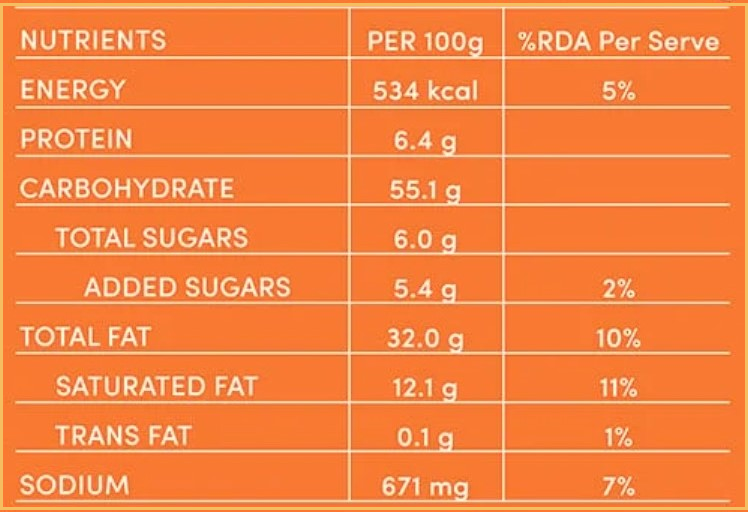

In [52]:
lp.draw_box(image, layout, box_width=3)

In [53]:
x_1=0
y_1=0
x_2=0
y_2=0

for l in layout:
  #print(l)
  if l.type == 'Figure' or l.type=='Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)

    break

0.0


In [54]:
print(x_1,y_1,x_2,y_2)

0 3 747 509


In [55]:
cv2.imwrite('ext3.jpg', image[y_1:y_2,x_1:x_2])

True

In [56]:
from paddleocr import PaddleOCR, draw_ocr

In [57]:
ocr = PaddleOCR(lang='en')
image_path = image_string
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

[2024/11/14 23:27:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ajayr/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ajayr/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [58]:
print(output)

[[[[20.0, 29.0], [166.0, 29.0], [166.0, 50.0], [20.0, 50.0]], ('NUTRIENTS', 0.9962797164916992)], [[[367.0, 27.0], [484.0, 31.0], [483.0, 56.0], [366.0, 52.0]], ('PER100g', 0.9971538186073303)], [[[515.0, 27.0], [721.0, 29.0], [720.0, 53.0], [515.0, 51.0]], ('%RDA Per Serve', 0.9393510222434998)], [[[19.0, 76.0], [126.0, 76.0], [126.0, 100.0], [19.0, 100.0]], ('ENERGY', 0.9972065091133118)], [[[372.0, 78.0], [480.0, 78.0], [480.0, 102.0], [372.0, 102.0]], ('534kcal', 0.9863919019699097)], [[[599.0, 76.0], [639.0, 76.0], [639.0, 105.0], [599.0, 105.0]], ('5%', 0.9994684457778931)], [[[18.0, 127.0], [134.0, 127.0], [134.0, 151.0], [18.0, 151.0]], ('PROTEIN', 0.9972370862960815)], [[[391.0, 123.0], [462.0, 130.0], [459.0, 159.0], [388.0, 152.0]], ('6.4g', 0.9951151609420776)], [[[20.0, 178.0], [233.0, 178.0], [233.0, 198.0], [20.0, 198.0]], ('CARBOHYDRATE', 0.9970757961273193)], [[[387.0, 175.0], [463.0, 180.0], [461.0, 205.0], [386.0, 201.0]], ('55.1g', 0.9246999025344849)], [[[56.0, 227

In [59]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [60]:
print(texts)

['NUTRIENTS', 'PER100g', '%RDA Per Serve', 'ENERGY', '534kcal', '5%', 'PROTEIN', '6.4g', 'CARBOHYDRATE', '55.1g', 'TOTALSUGARS', '6.0g', 'ADDEDSUGARS', '5.4g', '2%', 'TOTAL FAT', '32.0 g', '10%', 'SATURATEDFAT', '12.1g', '11%', 'TRANS FAT', '0.1g', '1%', 'SODIUM', '671 mg', '7%']


In [61]:
image_boxes = image_cv.copy()

In [62]:
for box,text in zip(boxes,texts):
  # Assuming box[0] and box[2] are lists of coordinates [x, y]
  # Accessing the x and y coordinates directly
  cv2.rectangle(image_boxes,(int(box[0][0]), int(box[0][1])), (int(box[2][0]), int(box[2][1])),(0,0,255),1)
  ##cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [63]:
cv2.imwrite('detections.jpg', image_boxes)

True

RECONSTRUCTION


In [64]:
im = image_cv.copy()

In [65]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)


In [66]:
cv2.imwrite('horiz_vert.jpg',im)

True

Non-Max Suppression

In [67]:
%pip install tensorflow

  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl (431 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle 2.6.2 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 5.28.3 which is incompatible.


In [68]:

import tensorflow as tf
import numpy as np

In [69]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [70]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[ 1  5  6  8 10 14 15 20 23 24]


In [71]:
im_nms = image_cv.copy()

In [72]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)


In [73]:
cv2.imwrite('im_nms.jpg',im_nms)

True

In [74]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [75]:
print(vert_out)

tf.Tensor([5 6 1], shape=(3,), dtype=int32)


In [76]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[1 5 6]


In [77]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)


In [78]:
cv2.imwrite('im_nms.jpg',im_nms)

True

Intersection and IOU


In [79]:
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(10, 3)
[['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', ''], ['', '', '']]


In [80]:
unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[367, 0, 483, 512]
[599, 0, 639, 512]
[18, 0, 134, 512]


In [81]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[2 0 1]


In [82]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [83]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0

  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))

  return inter / float(box_1_area + box_2_area - inter)

In [84]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [85]:
out_array=np.array(out_array)

In [86]:
out_array

array([['NUTRIENTS', 'PER100g', '%RDA Per Serve'],
       ['ENERGY', '534kcal', '5%'],
       ['PROTEIN', '6.4g', ''],
       ['CARBOHYDRATE', '55.1g', ''],
       ['TOTALSUGARS', '6.0g', ''],
       ['ADDEDSUGARS', '5.4g', '2%'],
       ['TOTAL FAT', '32.0 g', '10%'],
       ['SATURATEDFAT', '12.1g', '11%'],
       ['TRANS FAT', '0.1g', '1%'],
       ['SODIUM', '671 mg', '7%']], dtype='<U14')

In [87]:
import pandas as pd

In [88]:
pd.DataFrame(out_array).to_csv('final.csv')